In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

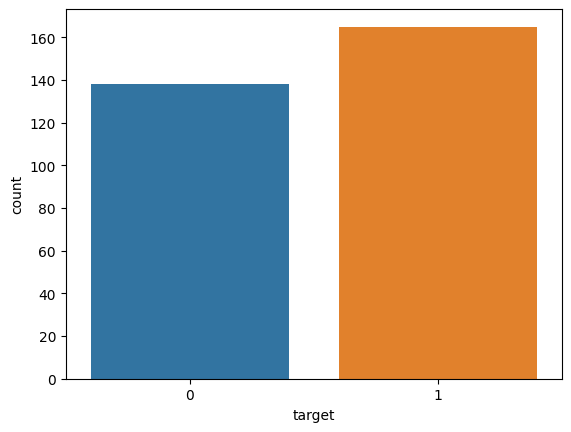

In [10]:
sns.countplot(x='target', data = df)

We have to predict the target feature and the values of the target feature is balanced... 
So no ned for sampling..


### EDA

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

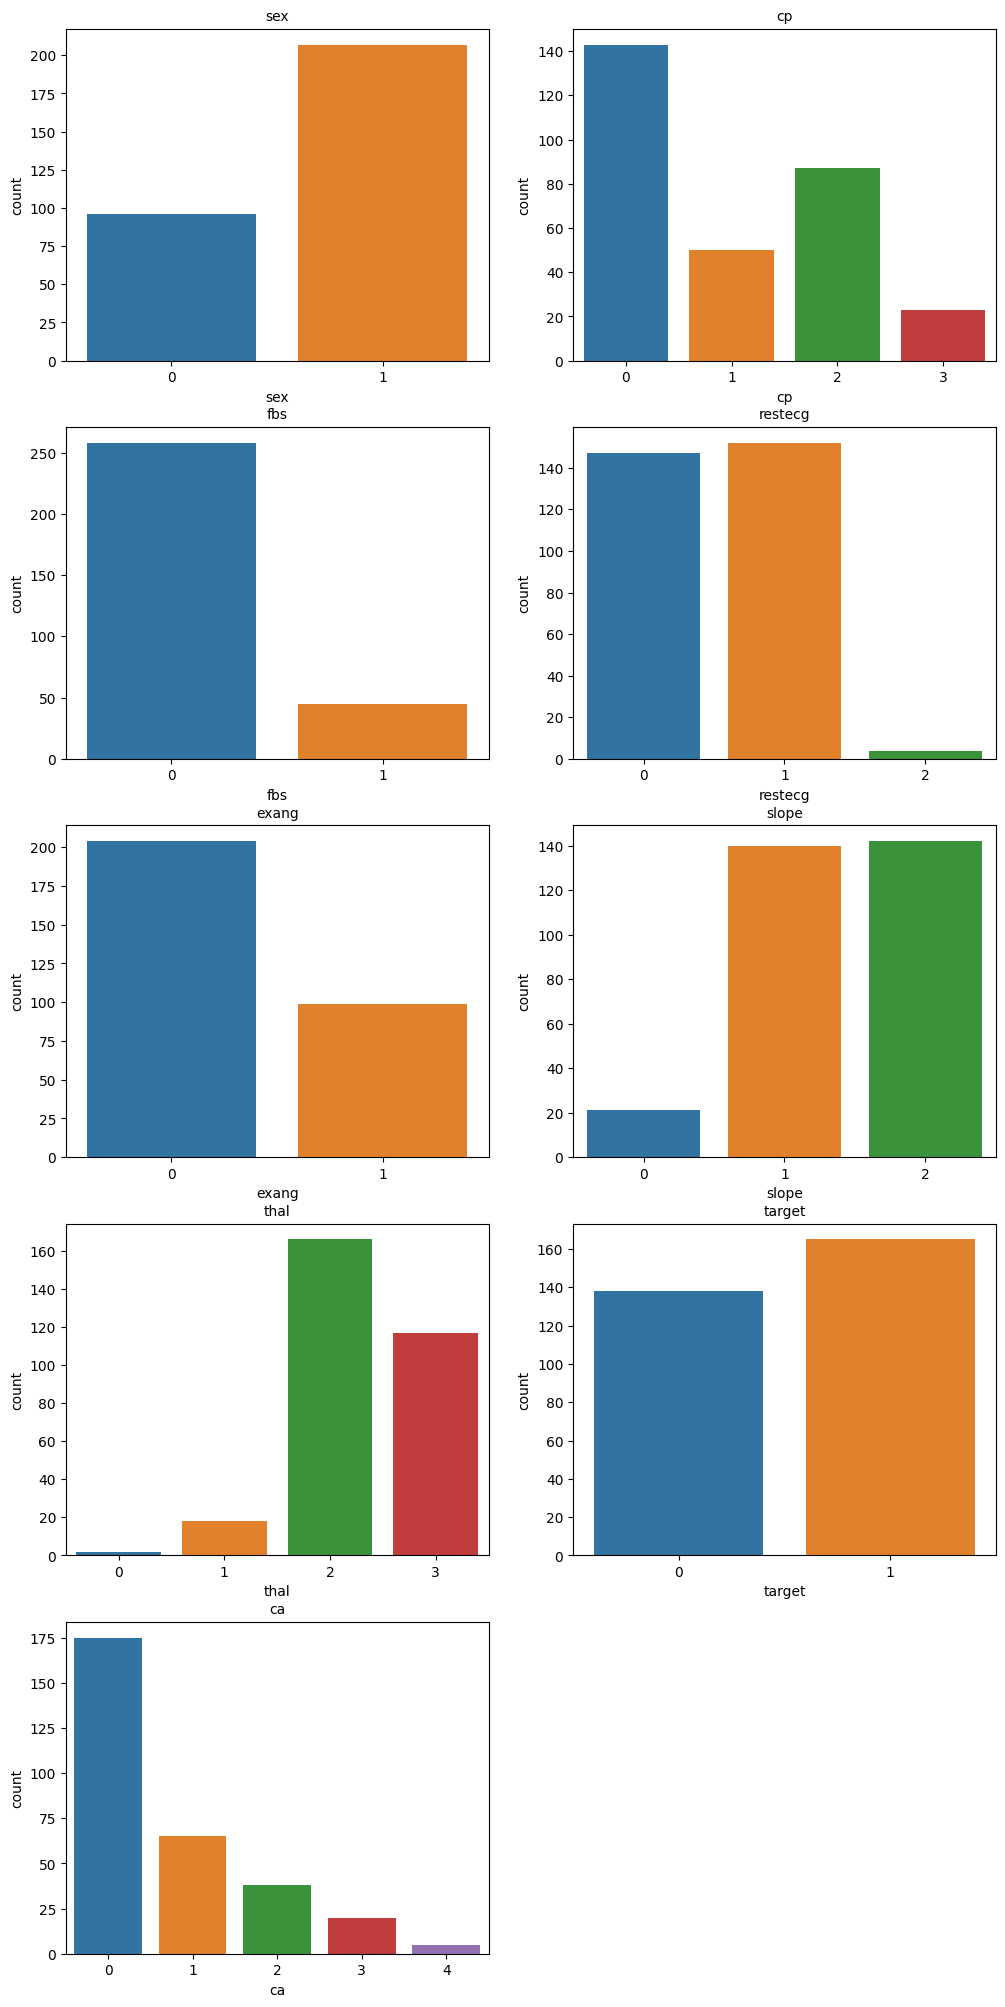

In [12]:
cat_columns = ['sex','cp', 'fbs','restecg','exang', 'slope', 'thal', 'target', 'ca']
size = len(cat_columns)
fig, axes = plt.subplots(nrows=(size+1)//2, ncols=2, figsize=(12,(size+1)//2*5))
for i,col in enumerate(cat_columns):
    row_index, col_index = divmod(i,2)
    sns.countplot(x=col,data=df, ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title(col , fontsize=10)

if size%2 == 1:
    fig.delaxes(axes[-1,-1])


In [13]:
num_columns = []
for i,col in enumerate(df.columns):
    if col not in cat_columns:
        num_columns.append(col)

print(num_columns)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


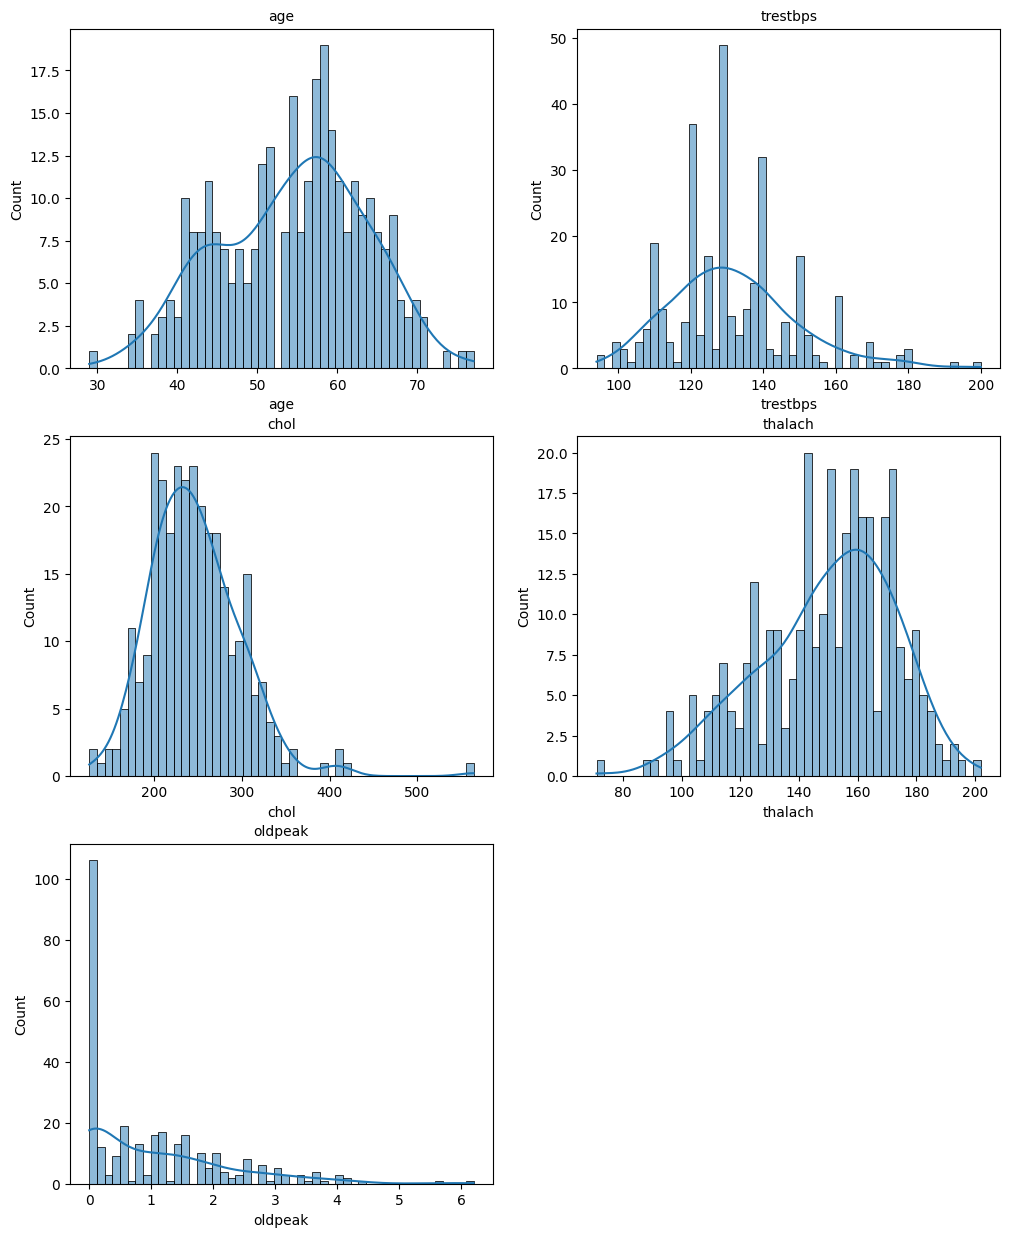

In [14]:
size = len(num_columns)
fig, axes = plt.subplots(nrows=(size+1)//2, ncols=2, figsize=(12,(size+1)//2*5))
for i,col in enumerate(num_columns):
    row_index, col_index = divmod(i,2)
    sns.histplot(x=col,data=df, ax=axes[row_index][col_index], kde= True, bins=50)
    axes[row_index][col_index].set_title(col , fontsize=10)

if size%2 == 1:
    fig.delaxes(axes[-1,-1])

<Axes: xlabel='oldpeak'>

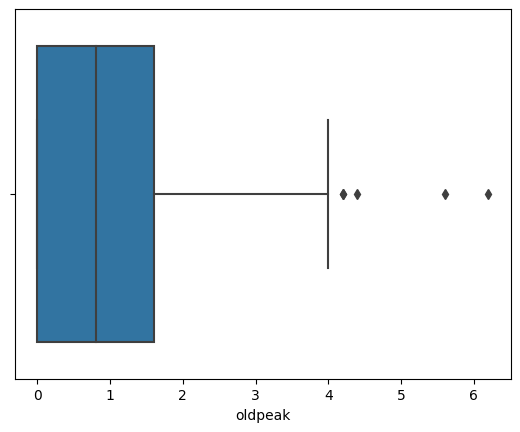

In [15]:
sns.boxplot(x='oldpeak', data=df)

<!-- Looks like there are some outliers in the distribution plot of oldpeak, Lets remove those outliers -->

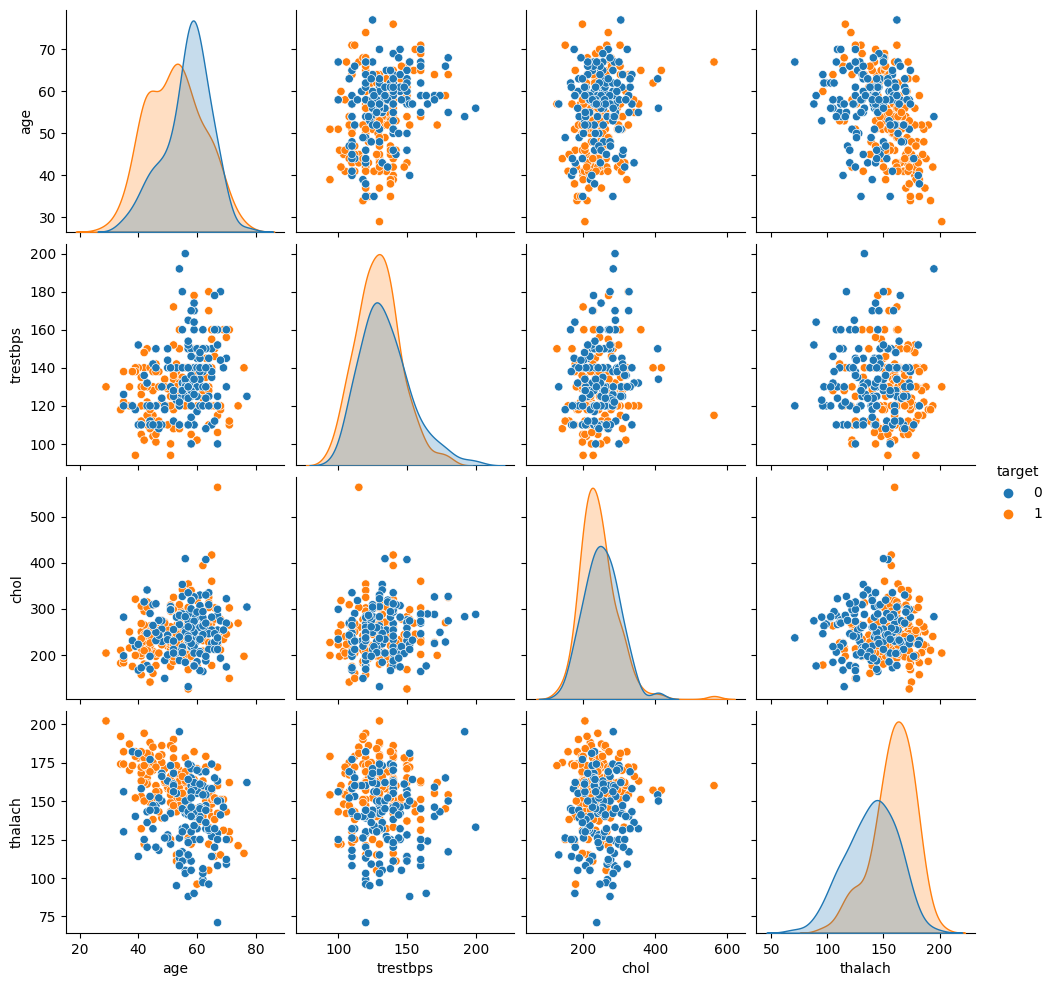

In [16]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<Axes: >

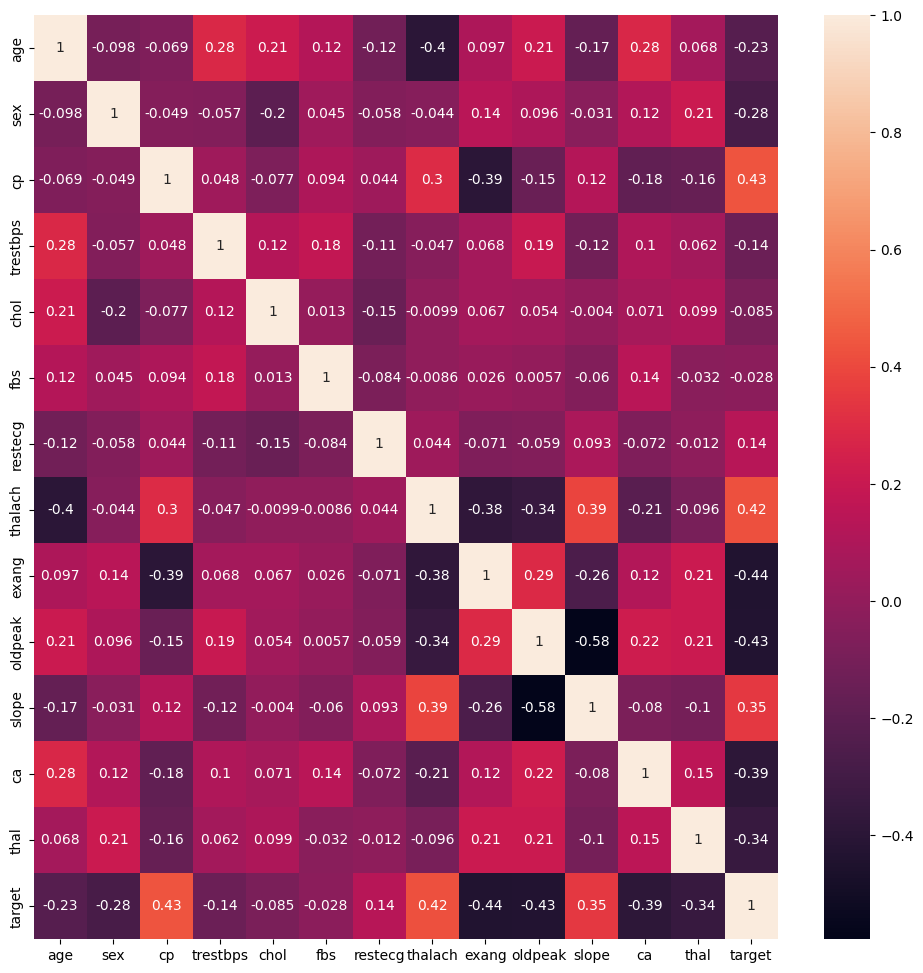

In [17]:
plt.figure(figsize= (12,12))
sns.heatmap(df.corr(), annot=True)

### Train Test Split || Data Preperation

In [18]:
X = df.drop('target', axis=1)
y = df['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sacler = StandardScaler()

In [23]:
X_train = sacler.fit_transform(X_train)
X_test = sacler.fit_transform(X_test)

### Logistics Regression  Model

In [24]:
from sklearn.linear_model import  LogisticRegression

In [25]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

Hyper-parameter of Logistic Regression:

- Regularization parameter (C): The regularization parameter (often denoted as C) is used to control the amount of regularization applied to the model. Regularization helps prevent overfitting by adding a penalty term to the loss function. A smaller value of C increases the regularization strength, making the model more resistant to overfitting. On the other hand, a larger value of C reduces regularization, allowing the model to fit the training data more closely.

- Solver: The solver is the optimization algorithm used to find the weights of the logistic regression model. Common solvers include "liblinear," "lbfgs," "saga," and "newton-cg." Each solver has its advantages and works better for specific types of data and problem sizes.

- multi_class: Determines the approach for handling multiple classes. Possible values are 'auto', 'ovr' (one-vs-rest), and 'multinomial'. 'auto' selects the best approach based on the data, while 'ovr' and 'multinomial' are explicit choices. The default is 'auto'.

- dual: This parameter is relevant only when the number of samples is smaller than the number of features. If True, the model solves the dual optimization problem. The default is False.

- class_weight: This parameter allows you to assign different weights to classes to balance the influence of different classes during training. It can be set to 'balanced' to automatically adjust the weights inversely proportional to class frequencies.


In [26]:
log_model = LogisticRegression(solver='saga',C=1 )

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

def report_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.show()
    
    # Calculate the probabilities for each class
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        if len(model.classes_) == 2:
            # For binary classification, consider only the positive class probability
            y_prob = y_prob[:, 1]
        else:
            # For multi-class classification, use one-vs-rest strategy and calculate ROC for each class
            y_prob = y_prob[np.arange(len(y_prob)), y_test]
    else:
        raise AttributeError("Model does not have a 'predict_proba' method.")
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Calculate the AUC (Area Under the Curve)
    auc_score = roc_auc_score(y_test, y_prob)
    
    # Plot the ROC curve
    plt.figure()
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name=type(model).__name__).plot()
    plt.show()




Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        37
           1       0.78      0.90      0.83        39

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76

Confusion Matrix:


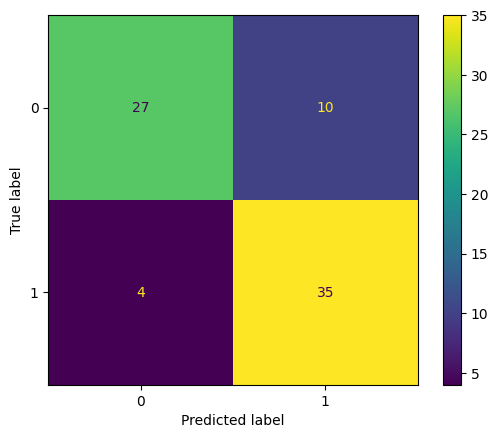

<Figure size 640x480 with 0 Axes>

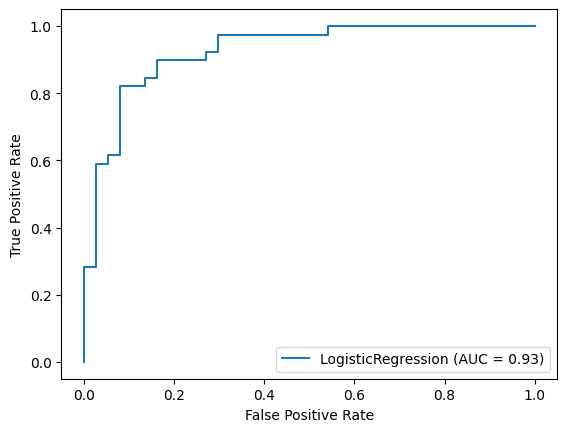

In [28]:
report_model(log_model)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'C': [0.1, 1.0,2.0,5.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
}

In [31]:
grid_model = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=10)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        37
           1       0.78      0.90      0.83        39

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76

Confusion Matrix:


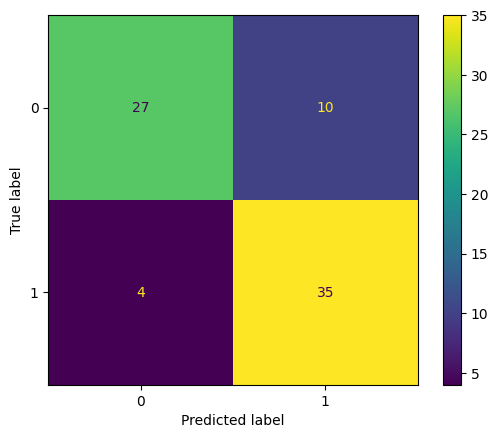

<Figure size 640x480 with 0 Axes>

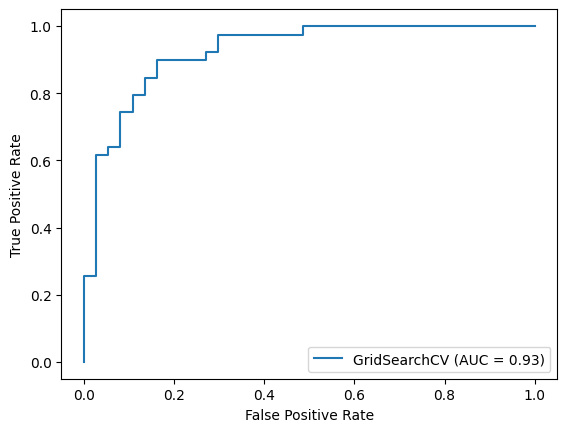

In [32]:
report_model(grid_model)

In [33]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'liblinear'}

We can perform the upper method with pippine

In [41]:
from sklearn.pipeline import Pipeline
log_pipe = LogisticRegression()

In [45]:
pipeline = Pipeline([('logreg',log_pipe)])

In [46]:
log_param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__max_iter': [100, 500, 1000]
}

In [47]:
pipe_grid_model = GridSearchCV(pipeline,log_param_grid,cv=10)

In [48]:
pipe_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__max_iter': [100, 500, 1000],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga']})

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        37
           1       0.78      0.92      0.85        39

    accuracy                           0.83        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76

Confusion Matrix:


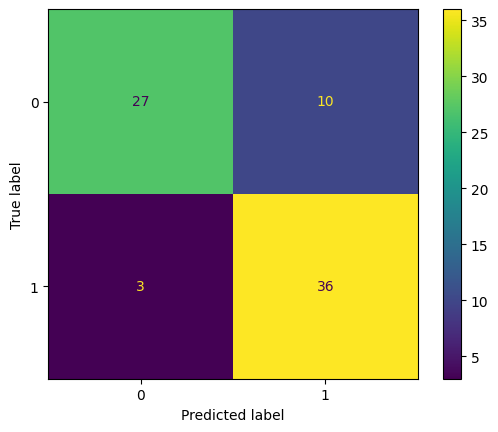

<Figure size 640x480 with 0 Axes>

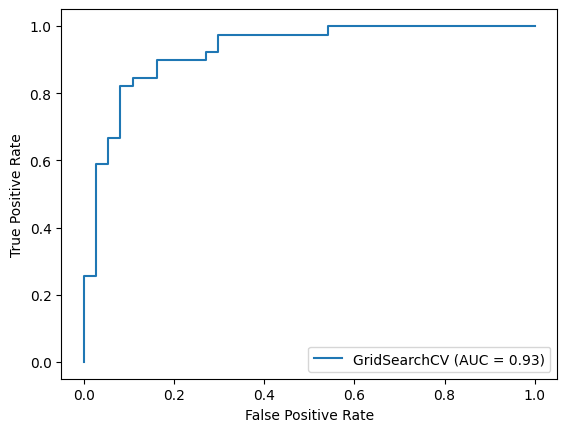

In [49]:
report_model(pipe_grid_model)